In [12]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install minisom

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Importación de las dependencias
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

from minisom import MiniSom

La primera parte del proyecto se basa en cargar los datos:

### 1. Cargar el conjunto de datos:

In [14]:
# Carga el conjunto de datos de vinos
data = load_wine()
x = data.data
y = data.target

### 2. Preprocesamiento de datos:

In [15]:
# Estandariza los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Ahora, `X_scaled` contiene los datos de características estandarizados, con una media de 0 y una desviación estándar de 1. Estos datos están listos para ser utilizados en el entrenamiento de la SOM.

La segunda parte del proyecto se enfoca en el entrenamiento de la SOM:


### 1. Inicializar la SOM:

In [20]:
# Define el tamaño de la cuadrícula de la SOM
grid_size = (10, 10)  # Puedes ajustar el tamaño según tu preferencia

# Inicializa la SOM
som = MiniSom(grid_size[0], grid_size[1], x_scaled.shape[1], sigma=0.5, learning_rate=0.5)

### 2. Entrenar la SOM:

In [17]:
# Entrena la SOM con los datos estandarizados
# Ajusta el número de iteraciones según sea necesario
som.train_random(x_scaled, 1000)

Ajusta los parámetros según lo creas conveniente. El número de iteraciones de entrenamiento (en este caso, 1000) es un hiperparámetro que puede ser ajustado dependiendo del tamaño del conjunto de datos y de la complejidad del problema. Experimenta con diferentes valores para obtener los mejores resultados.

Para completar la Parte 3 del proyecto se realizará las visualizaciones correspondientes junto con un análisis de cada una:

### 1. Mapa de Impactos (Hit Map):

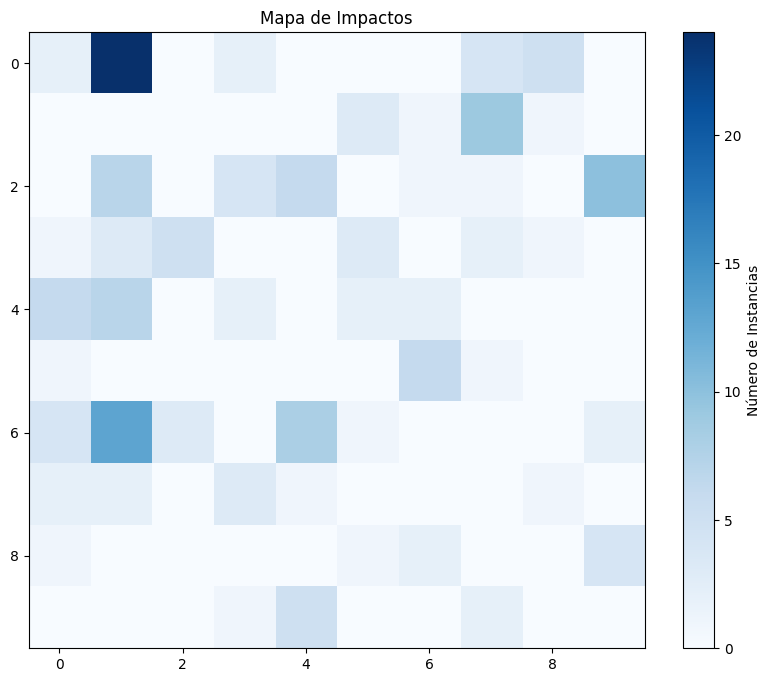

In [24]:
# Obtiene el mapa de impactos
hits_map = som.activation_response(x_scaled)

# Visualiza el mapa de impactos
plt.figure(figsize=(10, 8))
plt.title('Mapa de Impactos')

plt.imshow(hits_map, cmap='Blues')
plt.colorbar(label='Número de Instancias')

plt.show()

**Análisis:**
El mapa de impactos muestra cuántas veces cada neurona fue seleccionada como la mejor neurona ganadora (BMU) durante el entrenamiento. Las áreas más oscuras representan las neuronas que fueron seleccionadas más frecuentemente, lo que indica una mayor densidad de instancias en esas regiones de la SOM.

### 2. Plano de Componentes:

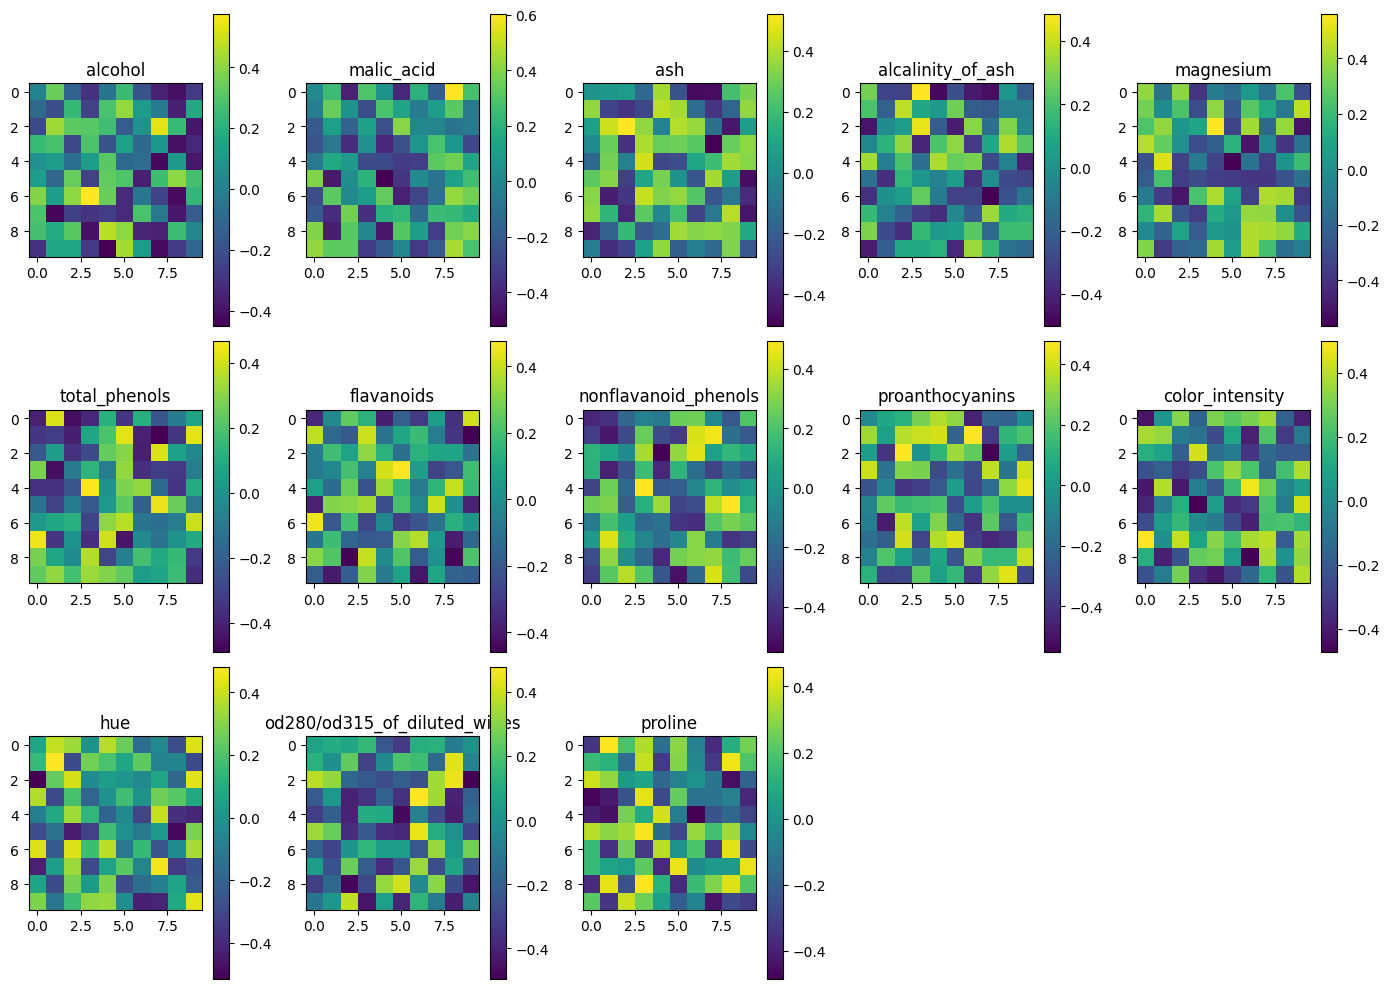

In [22]:
# Visualiza los planos de componentes para cada característica química

plt.figure(figsize=(14, 10))

for i in range(x_scaled.shape[1]):
    plt.subplot(3, 5, i+1)
    plt.title(data.feature_names[i])
    
    plt.imshow(som.get_weights()[:, :, i], cmap='viridis')
    plt.colorbar()

plt.tight_layout()

plt.show()

**Análisis:**
Los planos de componentes muestran cómo cada característica química contribuye al posicionamiento de los vinos en la SOM. Se puede observar la distribución de cada característica a lo largo de las neuronas de la SOM.

### 3. Agrupación y Clasificación:

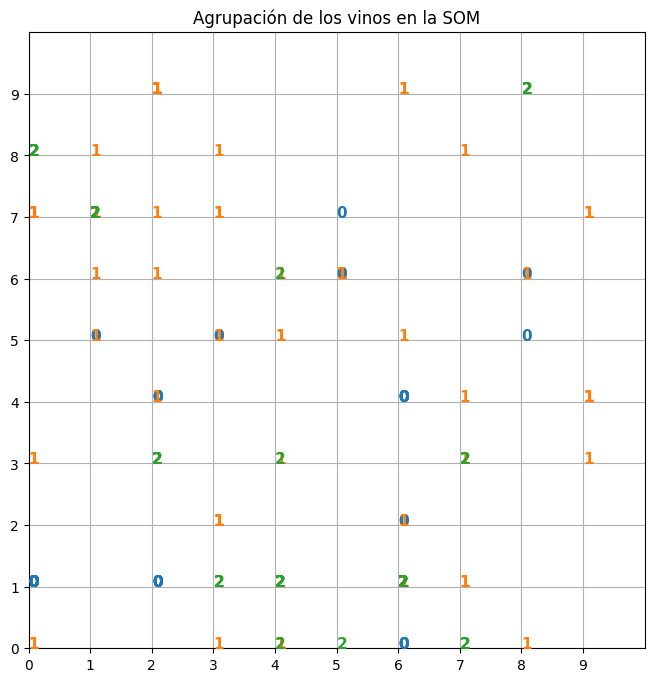

In [21]:
# Analiza cómo se agrupan y clasifican los vinos en la SOM

plt.figure(figsize=(10, 8))
plt.title('Agrupación de los vinos en la SOM')

for i, (x, label) in enumerate(zip(x_scaled, y)):
    winner = som.winner(x)
    plt.text(winner[0], winner[1], str(label), color=plt.cm.tab10(
        label), fontdict={'weight': 'bold', 'size': 11})
    
plt.xticks(np.arange(grid_size[0]))
plt.yticks(np.arange(grid_size[1]))

plt.grid()

plt.imshow(np.zeros(grid_size), cmap='Greys',
           extent=(0, grid_size[0], 0, grid_size[1]))

plt.show()


**Análisis:**
Este gráfico muestra cómo se agrupan los vinos en la SOM. Cada número en el mapa representa la etiqueta de clase del vino correspondiente. Se puede observar si la SOM logra agrupar los vinos de manera coherente con sus cultivares, lo que nos permite evaluar la calidad de la agrupación y clasificación realizada por la SOM.

Estas visualizaciones y análisis te proporcionarán una comprensión más profunda del comportamiento de la SOM en la clasificación de los vinos según sus cultivares. Ajusta los parámetros y experimenta con diferentes configuraciones para obtener mejores resultados si es necesario.

Parte 4:

### 1. Interpretación:

Basándome en los mapas de impactos y los planos de componentes, puedes observar cómo las diferentes características químicas influyen en la agrupación de los vinos en la SOM. Por ejemplo, si observamos que ciertas neuronas tienen una alta frecuencia de impacto y están ubicadas cerca unas de otras en el mapa de impactos, esto puede indicar que esas características tienen una fuerte influencia en la clasificación de los vinos. Además, al examinar los planos de componentes, puedes identificar cómo las características individuales están distribuidas en la SOM y cómo contribuyen al posicionamiento de los vinos en relación con otras instancias.

### 2. Desafíos y Soluciones:

Al trabajar con SOM, algunos desafíos comunes incluyen la selección de hiperparámetros (como el tamaño de la cuadrícula, la tasa de aprendizaje, la función de vecindad, etc.), así como la interpretación de los resultados. Para superar estos desafíos, es importante experimentar con diferentes configuraciones de parámetros y realizar un análisis exhaustivo de los resultados obtenidos. Además, la visualización de los mapas de impactos y los planos de componentes puede ayudar a comprender mejor el comportamiento de la SOM y facilitar la interpretación de los resultados.

### 3. Conclusión:

La efectividad de la SOM para clasificar los vinos según sus características químicas dependerá de varios factores, incluyendo la calidad de los datos, la elección adecuada de los hiperparámetros y la interpretación adecuada de los resultados. En general, la SOM puede ser una herramienta útil para la clasificación de datos multidimensionales y la identificación de patrones complejos en conjuntos de datos. Sin embargo, es importante tener en cuenta sus limitaciones y realizar experimentos adicionales para validar y mejorar los resultados obtenidos. En futuros experimentos, podrías considerar la incorporación de técnicas de selección de características, la exploración de diferentes arquitecturas de red SOM, o la comparación con otros métodos de clasificación para evaluar aún más la efectividad de la SOM en esta tarea específica.
